In [1]:
import os
os.chdir( "../")

In [2]:
import psutil
num_cpus = psutil.cpu_count(logical=False)
num_cpus 


8

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample


path = "Dataset/data_train.csv"
df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])

metric_to_optimize="MAP"

target_path = "Dataset/data_target_users_test.csv"
data_train = pd.read_csv(path)
data_target_df = pd.read_csv(target_path)

df

,UserID,ItemID,Interaction
0,1,15,1.0
1,1,16,1.0
2,1,133,1.0
3,1,161,1.0
4,1,187,1.0
...,...,...,...
478724,13024,13605,1.0
478725,13024,13823,1.0
478726,13024,15122,1.0
478727,13024,18185,1.0


In [4]:
data_target_df

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
10877,13020
10878,13021
10879,13022
10880,13023


In [5]:
urm_df =  df.pivot(index='UserID', columns='ItemID', values='Interaction').fillna(0)

In [6]:
cold_users = [x for x in range(1,data_target_df["user_id"].max()+1) if x not in urm_df.index.tolist()]
cold_users

[22,
 60,
 65,
 166,
 168,
 180,
 204,
 224,
 261,
 316,
 325,
 354,
 390,
 402,
 408,
 449,
 475,
 506,
 517,
 527,
 608,
 777,
 779,
 780,
 797,
 821,
 828,
 948,
 954,
 983,
 1004,
 1033,
 1063,
 1142,
 1159,
 1204,
 1222,
 1243,
 1246,
 1279,
 1314,
 1358,
 1425,
 1431,
 1525,
 1613,
 1626,
 1635,
 1739,
 1780,
 1821,
 1897,
 1927,
 2064,
 2082,
 2088,
 2093,
 2112,
 2121,
 2197,
 2232,
 2235,
 2238,
 2301,
 2356,
 2425,
 2435,
 2436,
 2470,
 2552,
 2575,
 2800,
 2858,
 2879,
 2931,
 2940,
 2957,
 2964,
 2980,
 3061,
 3070,
 3074,
 3090,
 3152,
 3159,
 3166,
 3201,
 3206,
 3252,
 3286,
 3358,
 3478,
 3482,
 3487,
 3503,
 3536,
 3581,
 3597,
 3691,
 3725,
 3799,
 3840,
 3874,
 3882,
 3914,
 3934,
 3973,
 3986,
 4091,
 4092,
 4097,
 4099,
 4129,
 4172,
 4218,
 4239,
 4286,
 4302,
 4304,
 4331,
 4376,
 4378,
 4492,
 4551,
 4601,
 4637,
 4656,
 4739,
 4759,
 4773,
 4844,
 4892,
 4970,
 4996,
 5011,
 5014,
 5057,
 5069,
 5115,
 5118,
 5183,
 5220,
 5285,
 5296,
 5304,
 5311,
 5319,
 532

In [7]:
cold_users_rows = pd.DataFrame(np.zeros((len(cold_users), urm_df.shape[1])), index=cold_users, columns=urm_df.columns)
cold_users_rows

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
full_df = pd.concat([urm_df, cold_users_rows])


In [9]:
full_df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            12837, 12894, 12899, 12921, 12955, 12958, 12963, 12992, 13011,
            13016],
           dtype='int64', length=13024)

In [10]:
sorted_full_df = full_df.sort_index(axis=0)

In [11]:
sorted_full_df

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13023,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
sorted_full_df

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13023,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
item_map = {i : item for i, item in enumerate(urm_df.columns)}
item_map_inv = {item : i for i, item in item_map.items()}


In [14]:
urm_all = sps.csr_matrix(sorted_full_df.to_numpy())
del urm_df
del full_df
del cold_users_rows
del sorted_full_df

import gc
gc.collect()

26

In [15]:
urm_all

<13024x22222 sparse matrix of type '<class 'numpy.float64'>'
	with 478729 stored elements in Compressed Sparse Row format>

In [16]:
userId_unique = urm_all.shape[0]
itemId_unique =  urm_all.shape[1]

In [17]:
#lets choose a randomic seed
seed = np.random.randint(1000000) 

urm_train, urm_validation = split_train_in_two_percentage_global_sample(urm_all, train_percentage = 0.80, seed = seed)


In [18]:
from Evaluation.Evaluator import EvaluatorHoldout
evaluator_test = EvaluatorHoldout(urm_validation, cutoff_list=[10], ignore_users=[])

EvaluatorHoldout: Ignoring 2579 (19.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users


In [19]:
DICT_RP3 = {'topK': 29, 'alpha': 0.33723025040409343, 'beta': 0.15542352567862933, 'normalize_similarity': True}

DICT_SLIMEN = {'topK': 638, 'l1_ratio': 0.026639245044358113, 'alpha': 0.001535792379351249} # 0.05018798797659525

DICT_IALS = {'use_gpu': True, 'num_threads' : 1, 'num_factors': 128, 'epochs': 478, 'confidence_scaling': 'linear', 'alpha': 3.358295366834473, 'epsilon': 7.295986722921583, 'reg': 6.292360640597378e-05}
# 0.03486293010333361

DICT_KNN = {'topK': 19, 'shrink': 28, 'similarity': 'tversky', 'normalize': True, 'tversky_alpha': 0.0, 'tversky_beta': 1.3672226785339947}

DICT_HYBIRD = {'alpha1': 0.6464483146524337, 'alpha2': 0.7533801103113421, 'alpha3': 0.032576355148477586, 'min_interaction': 1}

studies = [DICT_RP3, DICT_SLIMEN, DICT_IALS, DICT_KNN, DICT_HYBIRD]
recommenders_list = ["Hybrid", "itemKNN","RP3beta", "IALS", "SLIMEN", "TopPop"]

In [20]:
from Recommenders.Hybrid.GeneralizedLinearHybridRecommenderCold import GeneralizedLinearHybridRecommenderCold
from Recommenders.Recommender_import_list import *
from Recommenders.MatrixFactorization.ImplicitIALSRecommender import ImplicitALSRecommender

2024-01-08 18:20:54.175364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-08 18:20:54.175388: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
RP3 = RP3betaRecommender(urm_train,verbose=True) 
RP3.fit(**DICT_RP3)

SLIMEN = MultiThreadSLIM_SLIMElasticNetRecommender(urm_train,verbose=True)
SLIMEN.fit(workers=12,**DICT_SLIMEN)

IALS = ImplicitALSRecommender(urm_train, verbose=True)
IALS.fit(**DICT_IALS)

KNN = ItemKNNCFRecommender(urm_train, verbose=True)
KNN.fit(**DICT_KNN)

hybrid_recommender = GeneralizedLinearHybridRecommenderCold(urm_train, KNN, [RP3, SLIMEN, IALS],True,1)
hybrid_recommender.fit([0.6464483146524337, 0.7533801103113421, 0.032576355148477586])

TopPop_recommender = TopPop(urm_train)
TopPop_recommender.fit()

RP3betaRecommender: URM Detected 594 ( 4.6%) users with no interactions.
RP3betaRecommender: URM Detected 125 ( 0.6%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 8022.44 column/sec. Elapsed time 2.77 sec
SLIMElasticNetRecommender: URM Detected 594 ( 4.6%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 125 ( 0.6%) items with no interactions.


100%|█████████▉| 22216/22222 [00:35<00:00, 624.98it/s]


ImplicitALSRecommender: URM Detected 594 ( 4.6%) users with no interactions.
ImplicitALSRecommender: URM Detected 125 ( 0.6%) items with no interactions.
Using gpu: True


  0%|          | 0/478 [00:00<?, ?it/s]

ItemKNNCFRecommender: URM Detected 594 ( 4.6%) users with no interactions.
ItemKNNCFRecommender: URM Detected 125 ( 0.6%) items with no interactions.
Similarity column 22222 (100.0%), 13224.61 column/sec. Elapsed time 1.68 sec
RP3betaSLIMElasticNetImplicitALSHybridRecommender: URM Detected 594 ( 4.6%) users with no interactions.
RP3betaSLIMElasticNetImplicitALSHybridRecommender: URM Detected 125 ( 0.6%) items with no interactions.
TopPopRecommender: URM Detected 594 ( 4.6%) users with no interactions.
TopPopRecommender: URM Detected 125 ( 0.6%) items with no interactions.


In [22]:
recommenders = {
    "itemKNN" : KNN,
    "SLIMEN" : SLIMEN,
    "IALS" : IALS,
    "RP3beta" : RP3,
}


recommenders["TopPop"] = TopPop_recommender
recommenders["Hybrid"] = hybrid_recommender

In [23]:


recommenders_tuple = [(recommenders_list[i], 0, recommenders[recommenders_list[i]]) for i, study in enumerate(studies)]
# sort studies by best value
recommenders_tuple.append(("TopPop", 0.0, TopPop_recommender))
recommenders_tuple.sort(key=lambda x: x[1], reverse=True)
recommenders_tuple



[('Hybrid',
  0,
  <Recommenders.Hybrid.GeneralizedLinearHybridRecommenderCold.GeneralizedLinearHybridRecommenderCold at 0x7fa686854910>),
 ('itemKNN',
  0,
  <Recommenders.KNN.ItemKNNCFRecommender.ItemKNNCFRecommender at 0x7fa687477dc0>),
 ('RP3beta',
  0,
  <Recommenders.GraphBased.RP3betaRecommender.RP3betaRecommender at 0x7fa687477a00>),
 ('IALS',
  0,
  <Recommenders.MatrixFactorization.ImplicitIALSRecommender.ImplicitALSRecommender at 0x7fa7083ee190>),
 ('SLIMEN',
  0,
  <Recommenders.SLIM.SLIMElasticNetRecommender.MultiThreadSLIM_SLIMElasticNetRecommender at 0x7fa6b9ba6a90>),
 ('TopPop',
  0.0,
  <Recommenders.NonPersonalizedRecommender.TopPop at 0x7fa6868547c0>)]

In [75]:
good_sub_df = pd.read_csv("submission_SUPERHYBRID.csv")

In [61]:
import xgboost as xgb
from xgboost import XGBRanker, plot_importance
from Recommenders.BaseRecommender import BaseRecommender

class XGBoostRecommender(BaseRecommender):

    RECOMMENDER_NAME = "XGBoostRecommender"

    def __init__(self,
                URM_train,
                recommenders,
                main_recommender,
                verbose = True,
                n_estimators = 300,
                learning_rate = 1e-1,
                reg_alpha = 1e-1,
                reg_lambda = 1e-1,
                max_depth = 15,
                max_leaves = 0,
                grow_policy = "depthwise",
                objective = "pairwise",
                booster = "gbtree",
                random_seed = None,
                ):

        super(XGBoostRecommender, self).__init__(URM_train, verbose=verbose)

        self.XGB_model = XGBRanker(objective='rank:{}'.format(objective),
                                n_estimators = int(n_estimators),
                                random_state = random_seed,
                                learning_rate = learning_rate,
                                reg_alpha = reg_alpha,
                                reg_lambda = reg_lambda,
                                max_depth = int(max_depth),
                                max_leaves = int(max_leaves),
                                grow_policy = grow_policy,
                                verbosity = 0, # 2 if self.verbose else 0,
                                booster = booster,
                                tree_method = "gpu_hist",
                                device="cuda",
                                enable_categorical = True,
                                
                            )
        self.recommenders = recommenders
        self.main_recommender = main_recommender
        self.X_train = None
        self.y_train = None
        
    def fit(self,cutoff=20):
        xgboost_values = []
        suggestions, scores_MAIN = self.recommenders[self.main_recommender].recommend(data_target_df["user_id"]-1, cutoff=cutoff, return_scores=True)
        other_list = [recommender for recommender in recommenders_list if recommender != self.main_recommender]
        scores_others = {}
        for i, recommender in enumerate(other_list):
            _, scores_others[recommender] = self.recommenders[recommender].recommend(data_target_df["user_id"]-1, cutoff=cutoff, return_scores=True)
        for i, suggestion in enumerate(suggestions):
            for item_id in suggestion:
                xgboost_values.append([data_target_df["user_id"][i]-1, item_id, urm_validation[data_target_df["user_id"][i]-1,item_id] == 1,scores_MAIN[i][item_id]]+[scores_others[other][i][item_id] for other in other_list])
        
        # add top pop items to users with 0 label
        # toppop_items, scores_toppop = self.recommenders["TopPop"].recommend(1, cutoff=cutoff, return_scores=True)
        # for user in data_target["user_id"]:
        #     xgboost_values.append([user, toppop_items+1, 0, 0]+[0 for other in other_list if other != "TopPop"]+[scores_toppop[0][item_map[item]] for item in toppop_items])
        
        xgboost_df = pd.DataFrame(xgboost_values,columns=["user_id", "item_id", "label", self.main_recommender]+other_list)

        self.y_train = xgboost_df["label"]
        self.X_train = xgboost_df.drop(columns=["label"])
        self.X_train["user_id"] = self.X_train["user_id"].astype("category")
        self.X_train["item_id"] = self.X_train["item_id"].astype("category")
        groups = xgboost_df.groupby("user_id").size().values
        self.XGB_model.fit(self.X_train,
                    self.y_train,
                    group=groups,
                    verbose=True)
    
    def get_URM_train(self):
        return self.URM_train

    def _compute_item_score(self, user_id_array, items_to_compute):
        item_weights = np.zeros((len(user_id_array), self.n_items))
        for i, user in enumerate(user_id_array):
            if user in data_target_df["user_id"].values-1:
                X_to_predict = self.X_train[self.X_train["user_id"] == user]
                scores = self.XGB_model.predict(X_to_predict)
                scores = (scores - scores.min())/(scores.max() - scores.min() + 1e-12)
                item_weights[i][X_to_predict["item_id"]] = scores

        return item_weights

In [62]:
main_recommender = "Hybrid"
XGBoostRecommender = XGBoostRecommender(urm_train, recommenders, main_recommender)

XGBoostRecommender: URM Detected 594 ( 4.6%) users with no interactions.
XGBoostRecommender: URM Detected 125 ( 0.6%) items with no interactions.


In [63]:
XGBoostRecommender.fit(cutoff=15)

In [64]:
XGBoostRecommender.X_train[XGBoostRecommender.X_train["user_id"] == 0]

,user_id,item_id,Hybrid,itemKNN,RP3beta,IALS,SLIMEN,TopPop
0,0,100,0.785262,1.298059,0.547713,0.870130,0.534721,334.0
1,0,35,0.775904,0.924788,0.571675,0.767895,0.506160,576.0
2,0,122,0.515588,0.548295,0.285703,0.181366,0.431372,168.0
3,0,514,0.380058,0.564188,0.228551,0.437638,0.289435,83.0
4,0,505,0.376747,0.465596,0.199208,0.422365,0.310879,102.0
5,0,402,0.338733,0.645618,0.197520,0.595245,0.254394,104.0
6,0,591,0.244818,0.403985,0.110463,0.114124,0.225241,126.0
7,0,1082,0.222316,0.292153,0.091068,0.150496,0.210441,70.0
8,0,1545,0.190894,0.286105,0.100488,0.357072,0.151719,55.0
9,0,182,0.176260,0.219861,0.082771,0.176100,0.155321,283.0


In [31]:
evaluation_res = evaluator_test.evaluateRecommender(XGBoostRecommender)

EvaluatorHoldout: Processed 10445 (100.0%) in 2.89 min. Users per second: 60


In [32]:
evaluation_res[0]

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.12179,0.194498,0.158685,0.12179,0.194498,0.557204,0.269062,0.137811,0.557204,0.809946,...,0.801981,0.446867,0.801981,0.072089,10.430284,0.998021,0.206657,0.803471,1.431629,0.312823


/home/japo/miniconda3/envs/RecSysFramework/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [18:55:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

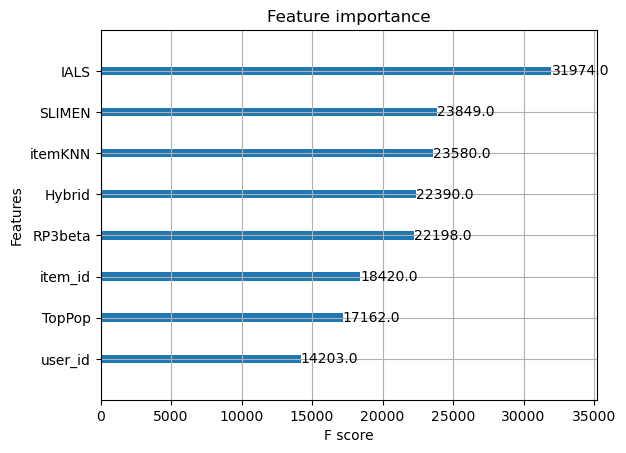

In [65]:
#plot importance
plot_importance(XGBoostRecommender.XGB_model)

In [66]:
base = XGBoostRecommender.X_train[XGBoostRecommender.X_train["user_id"] == 0]["item_id"].values

In [67]:
sugg = XGBoostRecommender.recommend([0], cutoff=10)[0]

In [68]:
suggest = [item_map[item] for item in sugg]
suggest

[101, 403, 515, 1546, 506, 123, 869, 592, 36, 3889]

In [83]:
good_sub_df[good_sub_df["user_id"] == 1]["item_list"].item()

'101 36 506 403 123 515 1546 694 52 977'

In [69]:
sugg = XGBoostRecommender.recommend([123], cutoff=10)[0]

In [70]:
suggest = [item_map[item] for item in sugg]
suggest

[1920, 5485, 346, 94, 3520, 2127, 10818, 2543, 1619, 34]

In [90]:
target_users["UserID"].max()

13024

In [96]:
a = [101, 403, 515, 1546, 506, 123, 869, 592, 36, 3889]

b = [101, 36, 506, 403, 123, 515, 1546, 694, 52, 977]

mask = np.where(a == b)
mask

(array([], dtype=int64),)

In [91]:
[int(x) for x in good_sub_df[good_sub_df["user_id"] == 1]["item_list"].item().split(" ")]

[101, 36, 506, 403, 123, 515, 1546, 694, 52, 977]

In [105]:
path = "Dataset/data_train.csv"
orig_df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])

In [114]:
from tqdm import tqdm
import numpy as np

# Convert 'our_best' to a dictionary for faster lookup
our_best_dict = {row["user_id"]: set(map(int, row["item_list"].split())) for _, row in good_sub_df.iterrows()}
print("BUILT DICTIONARY")
value = 0
unique_user_ids = target_users["UserID"].unique()
total_users = len(unique_user_ids)

# Use batch processing if possible in XGBoostRecommender.recommend
# Assuming recommend can take a list of users and return a list of recommendations
batch_recommendations = XGBoostRecommender.recommend(unique_user_ids - 1, cutoff=10)
print("made reccomendations")

for user_id, sugg in tqdm(zip(unique_user_ids, batch_recommendations), total=total_users):
    value += len(our_best_dict[user_id].intersection(sugg))

# Final calculation
value /= 10 * orig_df["UserID"].max()
value

BUILT DICTIONARY
made reccomendations


100%|██████████| 10882/10882 [00:00<00:00, 1449978.27it/s]


0.014196867321867321

In [71]:
sugg = XGBoostRecommender.recommend([64], cutoff=10)[0]

In [72]:
suggest = [item_map[item] for item in sugg]
suggest

[14848, 14844, 14833, 14847, 14835, 14846, 14840, 14834, 14839, 14832]

'101 36 506 403 123 515 1546 694 52 977'

In [46]:
item_popularity_encoded = np.ediff1d(urm_all.tocsc().indptr)
item_popularity_encoded = np.sort(item_popularity_encoded)

In [53]:
import pandas as pd
import numpy as np

path = "Dataset/data_train.csv"
df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])


df

,UserID,ItemID,Interaction
0,1,15,1.0
1,1,16,1.0
2,1,133,1.0
3,1,161,1.0
4,1,187,1.0
...,...,...,...
478724,13024,13605,1.0
478725,13024,13823,1.0
478726,13024,15122,1.0
478727,13024,18185,1.0


In [54]:
target_users = pd.read_csv("Dataset/data_target_users_test.csv")
target_users.columns = ["UserID"]

In [56]:
user_ids = df["UserID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
item_ids = df["ItemID"].unique().tolist()
item2item_encoded = {x: i for i, x in enumerate(item_ids)}
item_encoded2item = {i: x for i, x in enumerate(item_ids)}
df["User"] = df["UserID"].map(user2user_encoded)
df["Item"] = df["ItemID"].map(item2item_encoded)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

urm_all_oldstyle = sps.coo_matrix((df["Interaction"].values, 
                          (df["User"].values, df["Item"].values)))

In [60]:
item_popularity_encoded = np.ediff1d(urm_all_oldstyle.tocsc().indptr)
item_popularity_encoded = np.sort(item_popularity_encoded)

tar_users = target_users["UserID"].astype(int)
topPop_encoded = item_popularity_encoded[-10:]

submission = []

print(np.unique(df["UserID"].values))

for index, user in enumerate(tar_users):
    if (user not in df["UserID"].values):
        item_list = []
        item_list_encoded = topPop_encoded
        for item_encoded in item_list_encoded:
            item_list.append(item_encoded2item[item_encoded])
    else:
        item_list_encoded = XGBoostRecommender.recommend(user-1)[:10]
        item_list = [item_map[item] for item in item_list_encoded]
        
    submission.append((user, item_list))


def write_submission(submissions):
    with open("./submission_xgboost_j.csv", "w") as f:
        f.write("user_id,item_list\n")
        for user_id, items in submissions:
            f.write(f"{user_id},{' '.join([str(item) for item in items])}\n")
            
write_submission(submission)

[    1     2     3 ... 13022 13023 13024]
